In [2]:
import pandas as pd
import numpy as np


# profile report
#from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import os

# train test split
from sklearn.model_selection import train_test_split

# label encoder
from sklearn.preprocessing import LabelEncoder

# external functions file
import functions as f


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [3]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 1. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

In [4]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [6]:
df.shape

(593471, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

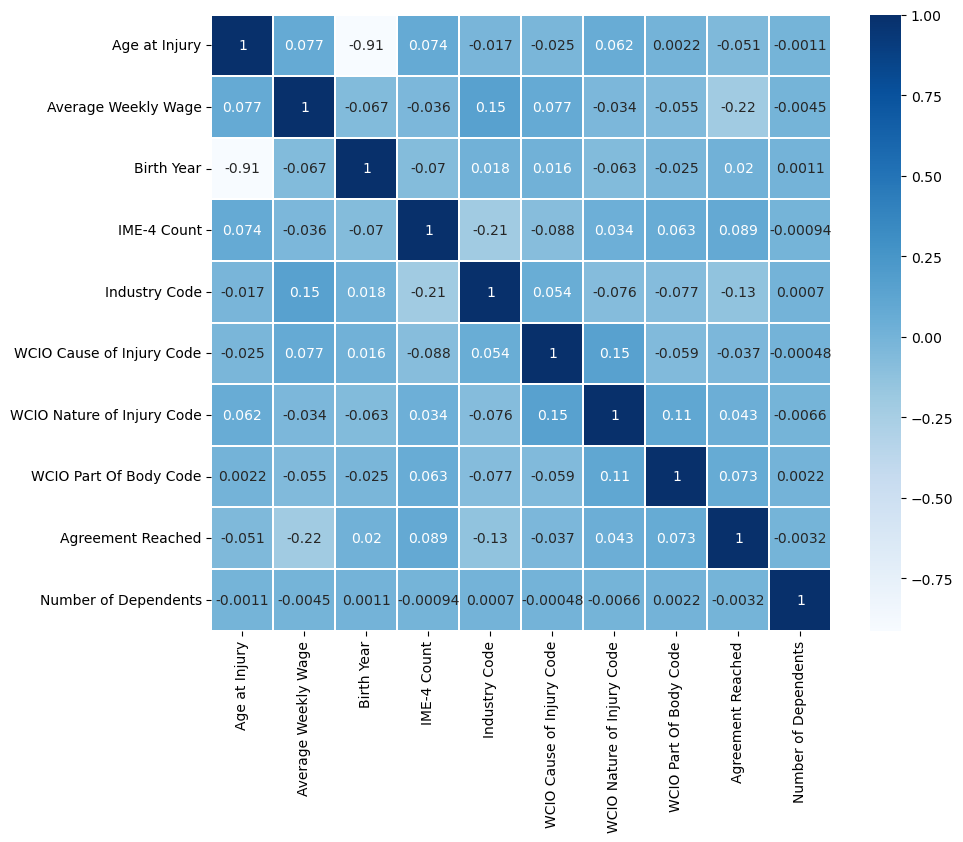

In [8]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp = temp.dropna()

# select numbers
corr_data = temp.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [9]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 1.1 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [10]:
df[df['Age at Injury'] > 100]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5415899,2020-01-24,102.0,N,2020-01-30,N,0.0,1917.0,2020-01-30,NaN,NORTH SYRACUSE CSD,3A. SELF PUBLIC,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13031,0.0,Not Work Related,2.0
5424769,2018-08-26,117.0,N,2020-02-10,N,0.0,1901.0,2020-02-10,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11218,0.0,Not Work Related,5.0
5432944,2020-02-17,113.0,N,2020-02-19,Y,692.0,1907.0,2020-02-19,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,NIAGARA,N,BUFFALO,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),NaN,0.0,Not Work Related,5.0
5453673,2020-03-05,104.0,N,2020-03-16,Y,0.0,1916.0,2020-03-16,NaN,ONEIDA COUNTY SELF INS PLAN,3A. SELF PUBLIC,2. NON-COMP,HERKIMER,N,SYRACUSE,NaN,M,NaN,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,10.0,CONTUSION,52.0,UPPER LEG,13502,0.0,Not Work Related,3.0
5459129,2018-03-22,117.0,N,2020-03-27,N,0.0,1901.0,2020-03-27,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,33.0,MANUFACTURING,IV,NaN,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11703,0.0,Not Work Related,2.0
5546365,2016-11-01,115.0,N,2020-08-28,N,0.0,0.0,2020-08-28,NaN,WESCO INSURANCE CO,1A. PRIVATE,1. CANCELLED,ERIE,N,BUFFALO,2020-12-03,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,15.0,BROKEN GLASS,40.0,LACERATION,34.0,WRIST,14140,0.0,Not Work Related,5.0
5559268,2020-09-11,110.0,N,2020-09-15,N,0.0,1910.0,2020-09-15,NaN,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,NaN,45.0,RETAIL TRADE,III,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,53.0,KNEE,10940,0.0,Not Work Related,1.0
5706270,2021-04-21,110.0,N,2021-04-23,N,0.0,1911.0,2021-04-23,NaN,WESCO INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,11946,0.0,Not Work Related,5.0
5804529,2021-07-02,101.0,N,2021-09-03,N,0.0,1920.0,2021-09-03,NaN,CAROLINA CASUALTY INS CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,35.0,HAND,11763,0.0,Not Work Related,0.0


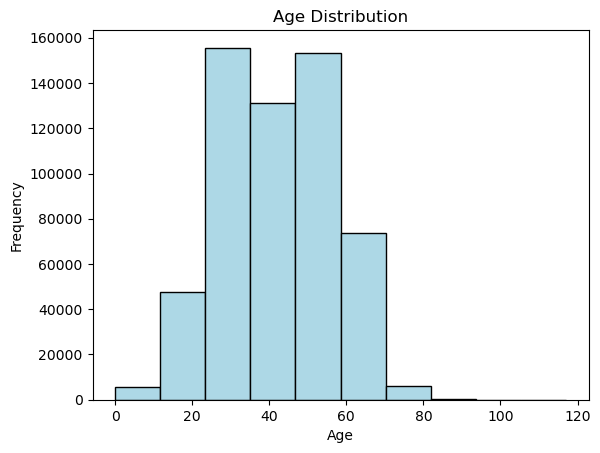

In [11]:
f.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [12]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


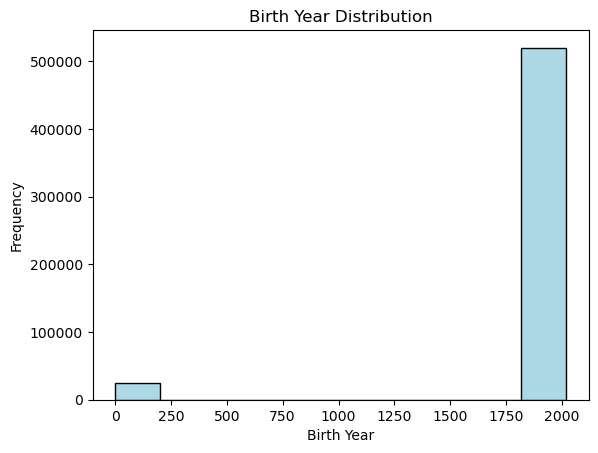

In [13]:
f.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

**IME-4 Count**

Very High 

In [14]:
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


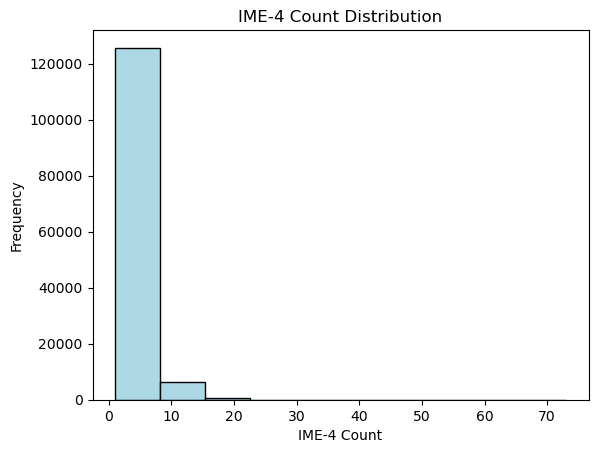

In [15]:
f.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

**OIICS Nature of Injury Description**

always missing

In [16]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Zip Code**

In [17]:
df[df['Zip Code'].notna() & 
    df['Zip Code'].apply(lambda x: not str(x).isnumeric())]


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5399802,2019-12-21,25.0,N,2020-01-09,N,1631.50,0.0,2020-01-09,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,Not Work Related,0.0
5404203,2020-01-11,29.0,N,2020-01-16,Y,1401.17,0.0,2020-03-11,2021-07-01,ACE AMERICAN INSURANCE CO.,1A. PRIVATE,5. PPD SCH LOSS,HERKIMER,N,BUFFALO,2020-10-27,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,0.0,Not Work Related,5.0
5407348,2019-12-28,23.0,N,2020-01-17,N,0.00,0.0,2020-01-17,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,0.0,Not Work Related,2.0
5412514,2019-11-26,51.0,N,2020-01-24,N,0.00,0.0,2020-01-24,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,WAYNE,N,ROCHESTER,NaN,M,NaN,31.0,MANUFACTURING,UK,NaN,10.0,MACHINE OR MACHINERY,13.0,CRUSHING,52.0,UPPER LEG,JMDMR,0.0,Not Work Related,4.0
5413081,2020-01-21,27.0,N,2020-01-27,N,0.00,0.0,2020-01-27,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,0.0,Not Work Related,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143240,2022-11-07,23.0,N,2022-11-29,N,0.00,0.0,2022-11-29,NaN,ARCH INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,NEW YORK,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,0.0,Not Work Related,2.0
6147711,2022-11-02,29.0,N,2022-12-06,N,0.00,0.0,2022-12-06,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,BROOME,N,BINGHAMTON,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,0.0,Not Work Related,3.0
6150118,2022-01-29,25.0,N,2022-12-09,Y,1748.25,0.0,2022-12-20,2022-12-06,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ALBANY,N,BUFFALO,2024-01-31,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,Not Work Related,0.0


**Agreement Reached**

w/ a lot of zeros

In [18]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

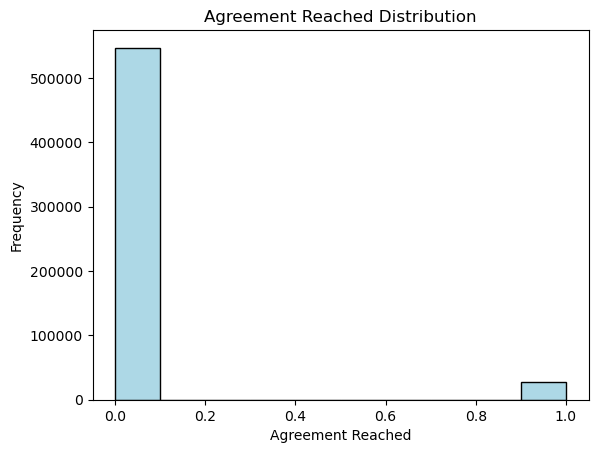

In [19]:
f.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [20]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [21]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [22]:
train_columns = set(df.columns)
test_columns = set(test.columns)

not_in_train = train_columns - test_columns
print(f'Columns in train but not in test: {not_in_train}')


Columns in train but not in test: {'Agreement Reached', 'WCB Decision', 'Claim Injury Type'}


## 1.2 Initial Visualisations

<a href="#top">Top &#129033;</a>

# 2. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

## 2.1 Duplicates

<a href="#top">Top &#129033;</a>

In [23]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
duplicates = df.duplicated(keep=False)

non_missing_in_other_columns = df.drop(columns=['Assembly Date']).notna().any(axis=1)


df[duplicates & non_missing_in_other_columns]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5686981,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0
5686771,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0


In [25]:
df = df.drop_duplicates()

verify the success

In [26]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 2.2 Feature Engineering

<a href="#top">Top &#129033;</a>

all transformations must be applied o X_test too

### 2.2.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [27]:
#df.info()

In [28]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

In [29]:
df.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


### 2.2.2 Encoding

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [30]:
freq = df['Alternative Dispute Resolution'].value_counts()
freq

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64

In [31]:
df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].map(freq)

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [32]:
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    392291
Y    181734
Name: count, dtype: int64

In [33]:
df['Attorney/Representative'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

In [34]:
df['Carrier Name'].nunique()

2046

frequency encoder

In [35]:
freq = df['Carrier Name'].value_counts()

In [36]:
df['Carrier Name'] = df['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [37]:
freq = df['Carrier Type'].value_counts()
freq

Carrier Type
1A. PRIVATE                                    285367
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [38]:
df['Carrier Type'] = df['Carrier Type'].map(freq)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [39]:
df['County of Injury'].nunique()

63

In [40]:
freq = df['County of Injury'].value_counts()

In [41]:
df['County of Injury'] = df['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [42]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546504
Y     27521
Name: count, dtype: int64

In [43]:
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

encode (8 uniques)

In [44]:
freq = df['District Name'].value_counts()
freq

District Name
NYC           270778
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [45]:
df['District Name'] = df['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [46]:
df['Gender'].value_counts()

Gender
M    335217
F    234051
U      4711
X        46
Name: count, dtype: int64

In [47]:
df['Gender'] = df['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

**Medical Fee Region**

encode

In [48]:
freq = df['Medical Fee Region'].value_counts()
freq

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33472
Name: count, dtype: int64

In [49]:
df['Medical Fee Region'] = df['Medical Fee Region'].map(freq)

### 2.2.3 Other transformations

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [50]:
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [51]:
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [52]:
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values

In [53]:
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan 
                                      if not str(x).isnumeric() else x)

**Columns not in test data**

In [54]:
df = df.drop(['Agreement Reached', 'WCB Decision'], axis = 1)

**Drop Transformed Columns**

In [55]:
df = df.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis = 1)

### 2.2.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [56]:
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [57]:
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [58]:
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [59]:
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


## 2.3 Missing Values

<a href="#top">Top &#129033;</a>

In [60]:
df.isna().sum()

Age at Injury                           1096
Alternative Dispute Resolution          1096
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-3 Date                              387877
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424324
Gender                                  1096
IME-4 Count                           442318
Industry Code                          11053
Industry Code Description              11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575121
WCIO Cause of Injury Code              16735
WCIO Cause of Injury Description       16735
WCIO Nature of Injury Code             16752
WCIO Natur

In [61]:
df[df['Claim Injury Type'].isna()]

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,1,NaN,NaN,NaN
653337074,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,2,NaN,NaN,NaN
489154817,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,3,NaN,NaN,NaN
351928125,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,4,NaN,NaN,NaN
454184427,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,27,NaN,NaN,NaN
820269517,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,28,NaN,NaN,NaN
815542773,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12,29,NaN,NaN,NaN


dropping them

In [62]:
df.dropna(subset=['Claim Injury Type'], inplace=True)

**Claim Injury Type**

After dropping the missing values we can encode

In [63]:
label_mapping = {
    "1. CANCELLED": 1,
    "2. NON-COMP": 2,
    "3. MED ONLY": 3,
    "4. TEMPORARY": 4,
    "5. PPD SCH LOSS": 5,
    "6. PPD NSL": 6,
    "7. PTD": 7,
    "8. DEATH": 8
}

df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

In [64]:
# encoder = LabelEncoder()
# df['Claim Injury Type'] = encoder.fit_transform(df['Claim Injury Type'])
# #encoder.inverse_transform([result])

**C-3 Date**

In [65]:
print(f'There are {len(df[df["C-3 Date"].isna()])} rows with missing values')
df[df['C-3 Date'].isna()].head(2)

There are 386781 rows with missing values


,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,571411.0,0.0,0.0,1988.0,NaT,12736.0,285367.0,2,3355.0,0.0,44646.0,NaT,0.0,NaN,44.0,RETAIL TRADE,135885.0,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,2019.0,12.0,30.0,2020,1,1,2019.0,12.0,31.0
5393889,40.0,571411.0,0.0,1434.8,1979.0,NaT,9126.0,285367.0,4,17450.0,0.0,86171.0,NaT,0.0,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,85033.0,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0,2019.0,12.0,6.0,2020,1,1,2020.0,1.0,1.0


In [66]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
df['C-3 Date Binary'] = df['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [67]:
print(f'There are {len(df[df["First Hearing Date"].isna()])} rows with missing values')
df[df['First Hearing Date'].isna()].head(2)

There are 423228 rows with missing values


,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,C-3 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,571411.0,0.0,0.0,1988.0,NaT,12736.0,285367.0,2,3355.0,0.0,44646.0,NaT,0.0,NaN,44.0,RETAIL TRADE,135885.0,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,2019.0,12.0,30.0,2020,1,1,2019.0,12.0,31.0,0
5393889,40.0,571411.0,0.0,1434.8,1979.0,NaT,9126.0,285367.0,4,17450.0,0.0,86171.0,NaT,0.0,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,85033.0,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0,2019.0,12.0,6.0,2020,1,1,2020.0,1.0,1.0,0


In [68]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year

df['First Hearing Year'] = df['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [69]:
print(f'There are {len(df[df["IME-4 Count"].isna()])} rows with missing values')
df[df['IME-4 Count'].isna()].head(2)

There are 441222 rows with missing values


,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,571411.0,0.0,0.0,1988.0,NaT,12736.0,285367.0,2,3355.0,0.0,44646.0,NaT,0.0,NaN,44.0,RETAIL TRADE,135885.0,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,2019.0,12.0,30.0,2020,1,1,2019.0,12.0,31.0,0,0
5393889,40.0,571411.0,0.0,1434.8,1979.0,NaT,9126.0,285367.0,4,17450.0,0.0,86171.0,NaT,0.0,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,85033.0,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0,2019.0,12.0,6.0,2020,1,1,2020.0,1.0,1.0,0,0


In [70]:
df['IME-4 Count'] = df['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [71]:
print(f'There are {len(df[df["OIICS Nature of Injury Description"].isna()])} rows with missing values')
df[df['OIICS Nature of Injury Description'].isna()].head(2)

There are 574025 rows with missing values


,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,571411.0,0.0,0.00,1988.0,NaT,12736.0,285367.0,2,3355.0,0.0,44646.0,NaT,0.0,0.0,44.0,RETAIL TRADE,135885.0,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,2019.0,12.0,30.0,2020,1,1,2019.0,12.0,31.0,0,0
5393091,46.0,571411.0,1.0,1745.93,1973.0,2020-01-14,2862.0,285367.0,4,760.0,0.0,40449.0,2020-02-21,1.0,4.0,23.0,CONSTRUCTION,135885.0,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4.0,2019.0,8.0,30.0,2020,1,1,2020.0,1.0,1.0,1,2020


In [72]:
# size of missing / size of dataset
len(df[df['OIICS Nature of Injury Description'].isna()]) / len(df)

1.0

drop not needed variables 

In [73]:
df = df.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

## 2.4 Visualisations

### Vizualizations with target value (Claim Injury Type)

**All Numeric Features Histogram**

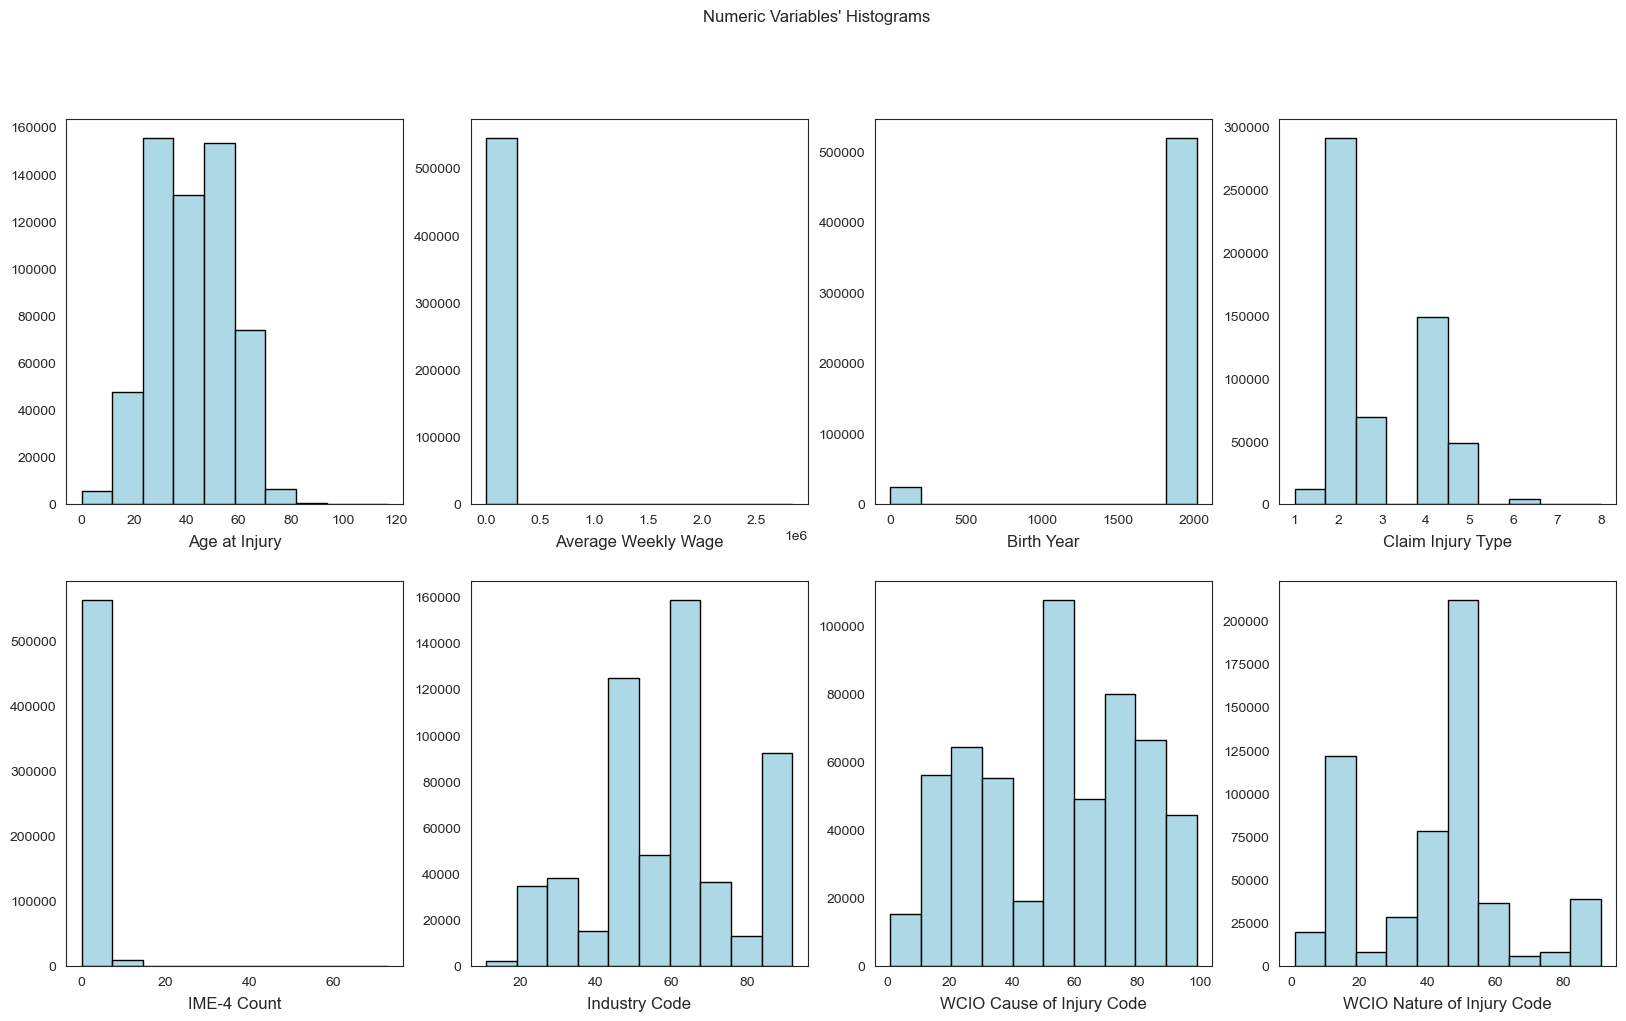

In [74]:
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "Claim Injury Type", "IME-4 Count", "Industry Code", "WCIO Cause of Injury Code", 
                   "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Number of Dependents"]

sns.set_style("white")
sp_rows = 2 
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat], edgecolor ="black", color="lightblue")
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

**Target Feature Histogram**

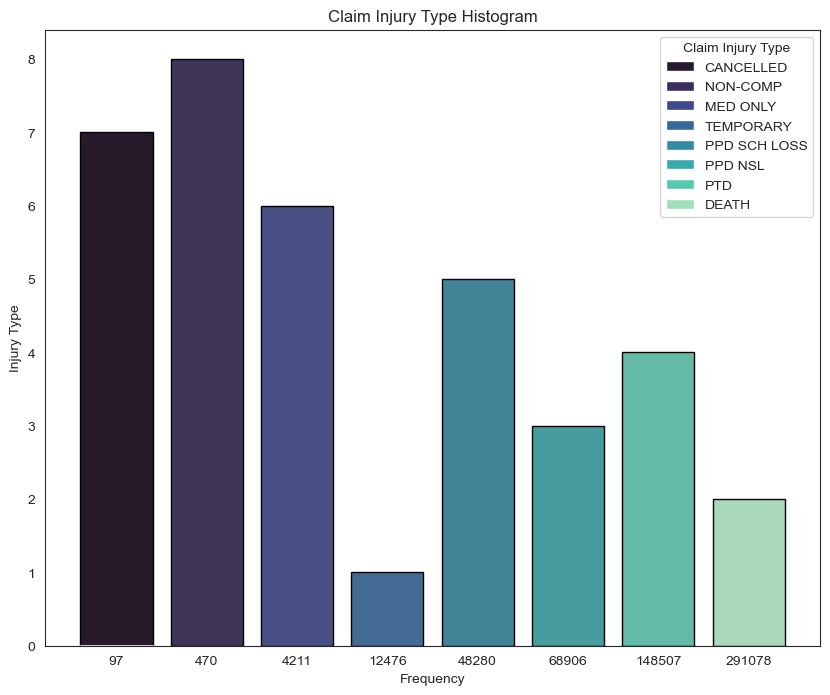

In [76]:
#Counting frequencies of each unique value in "Claim Injury Type"
injury_type = df["Claim Injury Type"].value_counts()

# Define the labels
labels = ['CANCELLED', 'NON-COMP', 'MED ONLY', 'TEMPORARY', 'PPD SCH LOSS', 'PPD NSL', 'PTD', 'DEATH']
palette = sns.color_palette("mako", len(labels))
sns.set_style("white")
plt.figure(figsize=(10, 8))
sns.barplot(x=injury_type.values, y=injury_type.index, palette=palette, edgecolor="black")

plt.xlabel("Frequency")
plt.ylabel("Injury Type")
plt.title("Claim Injury Type Histogram")

#Custom legends
for i, label in enumerate(labels):
    plt.bar(0, 0, color=palette[i], label=label) 

plt.legend(title="Claim Injury Type", loc='upper right')
plt.show()


**Correlation Matrix with Target Variable**

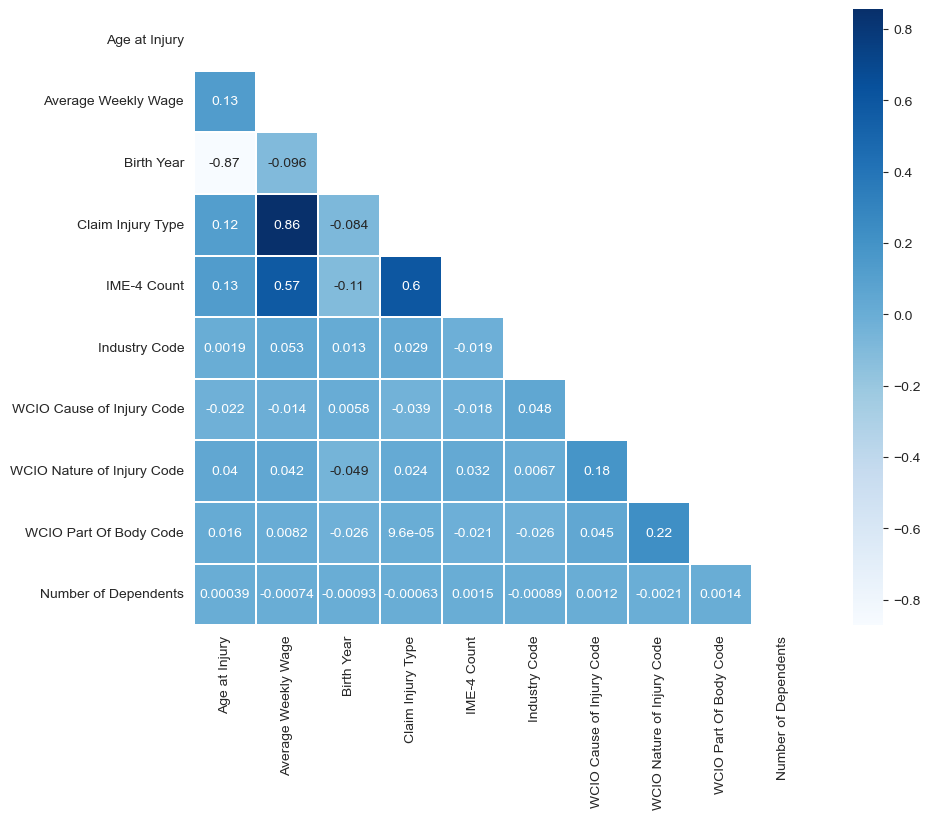

In [77]:
correlation_matrix = df[metric_features].corr(method='spearman') # pearson by default

#Generating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='Blues', linewidths=0.1)
plt.show()

# 3. Export

<a href="#top">Top &#129033;</a>

Drop treated columns before export

In [ ]:
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

**Export**

In [ ]:
df.to_csv('./project_data/out_eda1.csv')